# Data Wrangling & EDA of Home Credit Default Risk Datasets

## 1. Load the Data

There are 8 different source files, the following files will be loaded and examined to see which ones will be needed for our analysis.  

- application_{train|test}.csv
- bureau.csv
- bureau_balance.csv
- credit_card_balance.csv
- installments_payments.csv
- POS_CASH_balance.csv
- previous_application.csv

### 1.1 Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [163]:
import gc

### 1.2 Load the Data

In [3]:
#Read in the data from the 7 source files into 7 dataframes
df_application = pd.read_csv('data/application_train.csv', encoding= 'unicode_escape')
df_bureau = pd.read_csv('data/bureau.csv', encoding= 'unicode_escape')
df_bureau_balance = pd.read_csv('data/bureau_balance.csv', encoding= 'unicode_escape')
df_cc_balance = pd.read_csv('data/credit_card_balance.csv', encoding= 'unicode_escape')
df_installments_payment = pd.read_csv('data/installments_payments.csv', encoding= 'unicode_escape')
df_balance = pd.read_csv('data/POS_CASH_balance.csv', encoding= 'unicode_escape')
df_prev_application = pd.read_csv('data/previous_application.csv', encoding= 'unicode_escape')


In [5]:
df_application_test = pd.read_csv('data/application_test.csv', encoding= 'unicode_escape')

### 1.3 Explore the Data

In [6]:
#print the shape of each dataframe
print('Application_train Data: ', df_application.shape)
print('Bureau Data: ', df_bureau.shape)
print('Bureau Balance Data: ', df_bureau_balance.shape)
print('Credit Card Balance Data: ', df_cc_balance.shape)
print('installments Payment Data: ', df_installments_payment.shape)
print('POS_Cash Balance Data: ', df_balance.shape)
print('Previous Application Data: ', df_prev_application.shape)
print('Application_test Data: ', df_application_test.shape)

Application_train Data:  (307511, 122)
Bureau Data:  (1716428, 17)
Bureau Balance Data:  (27299925, 3)
Credit Card Balance Data:  (3840312, 23)
installments Payment Data:  (13605401, 8)
POS_Cash Balance Data:  (10001358, 8)
Previous Application Data:  (1670214, 37)
Application_test Data:  (48744, 121)


In [7]:
#explore the info for each dataframe
df_application
df_bureau
df_bureau_balance
df_cc_balance
df_installments_payment
df_balance
df_prev_application
df_application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.00,568800.00,20560.50,450000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
1,100005,Cash loans,M,N,Y,0,99000.00,222768.00,17370.00,180000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
2,100013,Cash loans,M,Y,Y,0,202500.00,663264.00,69777.00,630000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,1.00,4.00
3,100028,Cash loans,F,N,Y,2,315000.00,1575000.00,49018.50,1575000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
4,100038,Cash loans,M,Y,N,1,180000.00,625500.00,32067.00,625500.00,...,0,0,0,0,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.00,412560.00,17473.50,270000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
48740,456222,Cash loans,F,N,N,2,157500.00,622413.00,31909.50,495000.00,...,0,0,0,0,nan,nan,nan,nan,nan,nan
48741,456223,Cash loans,F,Y,Y,1,202500.00,315000.00,33205.50,315000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,3.00,1.00
48742,456224,Cash loans,M,N,N,0,225000.00,450000.00,25128.00,450000.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00


In [8]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [10]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [11]:
df_cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [11]:
df_installments_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [13]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [12]:
df_prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
df_application.TARGET.value_counts()/len(df_application)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

In [15]:
df_application.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [16]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


In [15]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
df_application.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


In [18]:
#count missing values in each column and sort them
missing = pd.concat([df_application.isnull().sum(), 100 * df_application.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...
NAME_HOUSING_TYPE,0,0.00
NAME_FAMILY_STATUS,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00


In [19]:
df_application.TARGET.unique()

array([1, 0], dtype=int64)

In [20]:
print(df_application.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [21]:
df_application.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [22]:
df_application[df_application.NAME_CONTRACT_TYPE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [23]:
df_application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [24]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [25]:
df_application.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [26]:
df_application.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [27]:
df_application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
df_application[df_application['AMT_ANNUITY'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.00,450000.00,nan,450000.00,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.03,-10668,-2523,-4946.00,-3238,nan,1,1,1,1,1,0,High skill tech staff,1.00,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,nan,0.63,0.37,0.01,nan,0.97,nan,nan,0.00,0.03,0.04,nan,nan,nan,0.01,nan,0.00,0.01,nan,0.97,nan,nan,0.00,0.03,0.04,nan,nan,nan,0.01,nan,0.00,0.01,nan,0.97,nan,nan,0.00,0.03,0.04,nan,nan,nan,0.01,nan,0.00,NaN,block of flats,0.01,"Stone, brick",No,1.00,0.00,1.00,0.00,-2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00
50035,157917,0,Cash loans,F,N,N,0,94500.00,450000.00,nan,450000.00,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.04,-9027,-1270,-3640.00,-741,nan,1,1,1,1,0,0,Laborers,2.00,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,nan,0.73,0.47,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-706.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,1.00
51594,159744,0,Cash loans,F,N,N,0,202500.00,539100.00,nan,450000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.05,-17376,-3950,-11524.00,-831,nan,1,1,0,1,0,0,Cooking staff,2.00,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.89,0.74,0.45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,1.00,0.00,1.00,0.00,-199.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,1.00
55025,163757,0,Cash loans,F,N,N,0,162000.00,296280.00,nan,22500

In [100]:
#create new dataframe (df) with columns that have less than 20% null values
columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 
                    'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE',
                    'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 
                    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                    'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                    'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' ]
df = df_application[columns]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#calculate applicant's age in year
df_application['age'] = (df_application['DAYS_BIRTH']/-365).astype(int)

In [30]:
#drop 'DAYS_BIRTH' column
df_application.drop('DAYS_BIRTH', axis=1, inplace=True)

In [35]:
abs(df_application['DAYS_EMPLOYED'].describe())

count   307511.00
mean     63815.05
std     141275.77
min      17912.00
25%       2760.00
50%       1213.00
75%        289.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [36]:
#convert 'DAYS_EMPLOYED' to years and add it to new column 'yrs_employed' 
#delete 'DAYS_EMPLOYED' COLUMN

df_application['yrs_employed'] = abs(round((df_application['DAYS_EMPLOYED']/365),1))
df_application.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [38]:
df_application['yrs_employed'].describe()

count   307511.00
mean       185.55
std        382.05
min          0.00
25%          2.60
50%          6.10
75%         15.60
max       1000.70
Name: yrs_employed, dtype: float64

In [44]:
df_application['yrs_employed'].mean()

6.526159714612087

In [39]:
#max years employed is an outlier/error 
#we will replace 1000.70 with NaN, then impute the mean of the 'yrs_employed' column
df_application['yrs_employed'].replace(1000.7, np.nan, inplace=True)

In [43]:
df_application['yrs_employed'] = df_application['yrs_employed'].fillna(
    value=round(df_application['yrs_employed'].mean(),1))

In [46]:
#clean up DAYS_REGISTRATION column (convert to years)
df_application['yrs_registration'] = round((df_application['DAYS_REGISTRATION']/-365),1)
df_application.drop('DAYS_REGISTRATION', axis=1, inplace=True)

In [47]:
df_application['yrs_publish'] = round((df_application['DAYS_ID_PUBLISH']/-365),1)
df_application.drop('DAYS_ID_PUBLISH', axis=1, inplace=True)

In [48]:
#check how many rows contain nulls for this column
df_application[df_application['CNT_FAM_MEMBERS'].isnull()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish
41982,148605,0,Revolving loans,M,N,Y,0,450000.00,675000.00,33750.00,nan,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.02,nan,1,1,1,1,1,0,Managers,nan,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.63,0.70,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,3.00,0.00,3.00,0.00,-876.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,33,3.20,8.90,12.30
187348,317181,0,Revolving loans,F,N,Y,0,202500.00,585000.00,29250.00,nan,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.03,nan,1,1,0,1,0,0,Accountants,nan,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,nan,0.65,0.67,0.10,0.05,1.00,0.96,0.01,0.08,0.07,0.38,0.42,nan,0.08,0.09,0.00,0.00,0.10,0.05,1.00,0.96,0.01,0.08,0.07,0.38,0.42,nan,0.09,0.09,0.00,0.00,0.10,0.05,1.00,0.96,0.01,0.08,0.07,0.38,0.42,nan,0.09,0.09,0.00,0.00,reg oper account,block of flats,0.08,Panel,No,1.00,0.00,1.00,0.00,-654.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,35,0.60,4.40,4.30


In [49]:
#fill the NaN values in CNT_FAM_MEMBERS with the median of the column (2 rows containing NaN)
df_application['CNT_FAM_MEMBERS'] = df_application['CNT_FAM_MEMBERS'].fillna(value=df_application['CNT_FAM_MEMBERS'].median())

In [50]:
#convert 'CNT_FAM_MEMBERS' to int
df_application['CNT_FAM_MEMBERS'] = df_application['CNT_FAM_MEMBERS'].astype(int)

In [51]:
#convert 'DAYS_LAST_PHONE_CHANGE' to years 
df_application['YRS_LAST_PHONE_CHANGE'] = round((df_application['DAYS_LAST_PHONE_CHANGE']/-365), 1)
df_application.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)

In [52]:
#count missing values in each column and sort them
missing = pd.concat([df_application.isnull().sum(), 100 * df_application.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
COMMONAREA_MODE,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MEDI,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [53]:
df_application['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [32]:
df_application['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single', inplace=True)

In [33]:
df_application['NAME_FAMILY_STATUS'].unique()

array(['Single', 'Married', 'Civil marriage', 'Widow', 'Separated',
       'Unknown'], dtype=object)

In [54]:
df_application.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [55]:
df_application[df_application['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.00,382500.00,19125.00,337500.00,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.02,13.00,1,1,1,1,1,0,NaN,2,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,nan,0.30,0.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,55,27.50,27.50,9.70,0.80
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.00,270000.00,13500.00,225000.00,Family,Working,Secondary / secondary special,Married,House / apartment,0.03,nan,1,1,1,1,1,0,Low-skill Laborers,4,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,nan,0.71,0.31,0.02,0.04,0.98,nan,nan,0.00,0.07,0.04,nan,0.02,nan,0.01,nan,0.00,0.02,0.04,0.98,nan,nan,0.00,0.07,0.04,nan,0.02,nan,0.01,nan,0.00,0.02,0.04,0.98,nan,nan,0.00,0.07,0.04,nan,0.02,nan,0.01,nan,0.00,NaN,block of flats,0.01,"Stone, brick",No,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,3.00,0.00,4.00,37,7.70,6.10,12.80,1.40
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.00,405000.00,20250.00,225000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.04,nan,1,1,1,1,1,0,Core staff,3,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.40,0.66,0.08,0.08,0.14,0.99,0.89,nan,0.00,0.14,0.17,0.04,nan,0.06,0.06,0.00,nan,0.08,0.14,0.99,0.90,nan,0.00,0.14,0.17,0.04,nan,0.07,0.06,0.00,nan,0.08,0.14,0.99,0.89,nan,0.00,0.14,0.17,0.04,nan,0.06,0.06,0.00,nan,reg oper spec account,block of flats,0.08,Panel,No,7.00,1.00,7.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00,29,3.40,0.50,4.60,2.30
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.00,540

In [56]:
#delete rows with CODE_GENDER=='XNA'
df_application = df_application[df_application.CODE_GENDER != 'XNA']

In [57]:
df_application.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [58]:
#df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)
#get the average for the EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 and store in new column
df_application['ext_source_avg'] = df_application[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [59]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE,ext_source_avg
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,nan,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,25,1.70,10.00,5.80,3.10,0.16
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,nan,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,45,3.30,3.20,0.80,2.30,0.47
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,26.00,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,52,0.60,11.70,6.90,2.20,0.64
3,100006,0

In [60]:
#Check null values in ext_source_avg and impute with median 
print(df_application['ext_source_avg'].isna().sum())
df_application['ext_source_avg'] = df_application['ext_source_avg'].fillna(
    value=df_application['ext_source_avg'].median())
print(df_application['ext_source_avg'].isna().sum())

172
0


In [90]:
#sum all FLAG_DOCUMENT_ columns into one column
df_application['flag_doc'] = df_application[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                                             'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                             'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                             'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'
                                            ]].sum(axis=1)

In [62]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE,ext_source_avg,flag_doc
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,nan,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,25,1.70,10.00,5.80,3.10,0.16,1
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,nan,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,45,3.30,3.20,0.80,2.30,0.47,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,26.00,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,52,0.60,11.70,6.90,2.20,0.

In [63]:
df_application.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum()

1021

In [64]:
df_application.OBS_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [65]:
#impute median for:  OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
df_application['OBS_30_CNT_SOCIAL_CIRCLE'] = df_application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['DEF_30_CNT_SOCIAL_CIRCLE'] = df_application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['OBS_60_CNT_SOCIAL_CIRCLE'] = df_application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['DEF_60_CNT_SOCIAL_CIRCLE'] = df_application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())

In [66]:
df_application[df_application.AMT_ANNUITY.isna()]

#check null values for AMT_ANNUITY and impute mean
df_application['AMT_ANNUITY'] = df_application['AMT_ANNUITY'].fillna(value=df_application['AMT_ANNUITY'].mean())

In [67]:
#Check null values in AMT_GOODS_PRICE and impute with median 
#AMT_GOODS_PRICE has 278 NaNs 
df_application['AMT_GOODS_PRICE'] = df_application['AMT_GOODS_PRICE'].fillna(
    value=df_application['AMT_GOODS_PRICE'].median())
print(df_application['AMT_GOODS_PRICE'].isna().sum())

0


In [68]:
#fill 'Unaccompanied' for nan values in NAME_TYPE_SUITE column 
df_application['NAME_TYPE_SUITE'] = df_application['NAME_TYPE_SUITE'].fillna(value=df_application.NAME_TYPE_SUITE.mode()[0])

In [70]:
df_application['YRS_LAST_PHONE_CHANGE'] = df_application['YRS_LAST_PHONE_CHANGE'].fillna(value=df_application.YRS_LAST_PHONE_CHANGE.mean())

In [135]:
import pandas_profiling as pp

profile = pp.ProfileReport(df_application)

profile.to_file("Application PP2.html")

Summarize dataset:   0%|          | 0/138 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:01<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'age' ,'yrs_employed', 'yrs_registration',
           'yrs_publish','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'YRS_LAST_PHONE_CHANGE', 
            'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 
                    'FLAG_MOBIL','FLAG_EMP_PHONE',
                    'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
           'CNT_FAM_MEMBERS', 
                    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                    'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
           'ext_source_avg',
                    'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                    'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'flag_doc']

df = df_application[columns]

In [72]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,age,yrs_employed,yrs_registration,yrs_publish,FLAG_OWN_CAR,FLAG_OWN_REALTY,YRS_LAST_PHONE_CHANGE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,ext_source_avg,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,flag_doc
0,100002,1,Cash loans,M,25,1.70,10.00,5.80,N,Y,3.10,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.16,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,1
1,100003,0,Cash loans,F,45,3.30,3.20,0.80,N,N,2.30,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.47,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2,100004,0,Revolving loans,M,52,0.60,11.70,6.90,Y,Y,2.20,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,100006,0,Cash loans,F,52,8.30,26.90,6.70,N,Y,1.70,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,nan,0.65,nan,0.65,2.00,0.00,2.00,0.00,nan,nan,nan,nan,nan,nan,1
4,100007,0,Cash loans,M,54,8.30,11.80,9.50,N,Y,3.00,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,nan,0.32,nan,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [141]:
profile = pp.ProfileReport(df)

profile.to_file("Application-ReducedColumns.html")

Summarize dataset:   0%|          | 0/70 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:01<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
empYrs = df[df['yrs_employed'] < 0]

In [73]:
#count missing values in each column and sort them
missing = pd.concat([df_application.isnull().sum(), 100 * df_application.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
COMMONAREA_AVG,214862,69.87
COMMONAREA_MEDI,214862,69.87
COMMONAREA_MODE,214862,69.87
NONLIVINGAPARTMENTS_MEDI,213512,69.43
NONLIVINGAPARTMENTS_MODE,213512,69.43
NONLIVINGAPARTMENTS_AVG,213512,69.43
FONDKAPREMONT_MODE,210293,68.39
LIVINGAPARTMENTS_MEDI,210197,68.36
LIVINGAPARTMENTS_MODE,210197,68.36
LIVINGAPARTMENTS_AVG,210197,68.36


In [84]:
#impute median for: 
#AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,
#AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT
df_application['AMT_REQ_CREDIT_BUREAU_DAY'] = df_application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['AMT_REQ_CREDIT_BUREAU_MON'] = df_application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())
df_application['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.median())

In [85]:
#count missing values in each column and sort them
missing = pd.concat([df_application.isnull().sum(), 100 * df_application.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
COMMONAREA_AVG,214862,69.87
COMMONAREA_MEDI,214862,69.87
COMMONAREA_MODE,214862,69.87
NONLIVINGAPARTMENTS_MEDI,213512,69.43
NONLIVINGAPARTMENTS_MODE,213512,69.43
NONLIVINGAPARTMENTS_AVG,213512,69.43
FONDKAPREMONT_MODE,210293,68.39
LIVINGAPARTMENTS_MEDI,210197,68.36
LIVINGAPARTMENTS_MODE,210197,68.36
LIVINGAPARTMENTS_AVG,210197,68.36


In [ ]:
columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'age' ,'yrs_employed', 'yrs_registration',
           'yrs_publish','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'YRS_LAST_PHONE_CHANGE', 
            'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 
                    'FLAG_MOBIL','FLAG_EMP_PHONE',
                    'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
           'CNT_FAM_MEMBERS', 
                    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                    'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
           'ext_source_avg',
                    'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                    'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'flag_doc']

df = df_application[columns]

In [87]:
print(df_application.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'age', 'yrs_employed', 'yrs_registration',
       'yrs_publish', 'YRS_LAST_PHONE_CHANGE', 'ext_source_avg', 'flag_doc'],
      dtype='object', length=124)


In [91]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE,ext_source_avg,flag_doc
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,nan,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,25,1.70,10.00,5.80,3.10,0.16,1
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,nan,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,45,3.30,3.20,0.80,2.30,0.47,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,26.00,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,52,0.60,11.70,6.90,2.20,0.

In [93]:
#drop the following columns 
#Used my general knowledge to drop these columns - alot of the columns have 69% values missing
#having a brick house or a basement wouldn't affect the application - general it's not information required when 
#applying
#will test the model without those features - if the score is not satisfactory will come back and add some
#of the features - and drop the rows with missing values. 
drop_col = ['OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
            'FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
           'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
            'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
           'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
           'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
           'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
            'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
            'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
            'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE',
            'TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
            'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
            'FLAG_DOCUMENT_21']
df_application.drop(drop_col, axis=1, inplace=True)

In [94]:
#count missing values in each column and sort them
missing = pd.concat([df_application.isnull().sum(), 100 * df_application.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
EXT_SOURCE_1,173376,56.38
OCCUPATION_TYPE,96389,31.35
EXT_SOURCE_3,60965,19.83
EXT_SOURCE_2,660,0.21
SK_ID_CURR,0,0.00
REG_CITY_NOT_WORK_CITY,0,0.00
ORGANIZATION_TYPE,0,0.00
OBS_30_CNT_SOCIAL_CIRCLE,0,0.00
DEF_30_CNT_SOCIAL_CIRCLE,0,0.00
OBS_60_CNT_SOCIAL_CIRCLE,0,0.00


In [95]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [96]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [98]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,nan,0,91323.00,0.00,nan,0.00,Consumer credit,-131,nan
1,215354,5714463,Active,currency 1,-208,0,1075.00,nan,nan,0,225000.00,171342.00,nan,0.00,Credit card,-20,nan
2,215354,5714464,Active,currency 1,-203,0,528.00,nan,nan,0,464323.50,nan,nan,0.00,Consumer credit,-16,nan
3,215354,5714465,Active,currency 1,-203,0,nan,nan,nan,0,90000.00,nan,nan,0.00,Credit card,-16,nan
4,215354,5714466,Active,currency 1,-629,0,1197.00,nan,77674.50,0,2700000.00,nan,nan,0.00,Consumer credit,-21,nan


In [99]:
df_bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [100]:
df_bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [101]:
#count missing values in each column and sort them
missing = pd.concat([df_bureau.isnull().sum(), 100 * df_bureau.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
AMT_ANNUITY,1226791,71.47
AMT_CREDIT_MAX_OVERDUE,1124488,65.51
DAYS_ENDDATE_FACT,633653,36.92
AMT_CREDIT_SUM_LIMIT,591780,34.48
AMT_CREDIT_SUM_DEBT,257669,15.01
DAYS_CREDIT_ENDDATE,105553,6.15
AMT_CREDIT_SUM,13,0.00
CREDIT_ACTIVE,0,0.00
CREDIT_CURRENCY,0,0.00
DAYS_CREDIT,0,0.00


In [181]:
df_bureau.CREDIT_TYPE.unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

# 2. Exploratory Data Analysis

In [ ]:
#add credit duration info to df_bureau
df_bureau['CREDIT_LENGTH'] = -df_bureau['DAYS_CREDIT'] + df_bureau['DAYS_CREDIT_ENDDATE']   #length of credit in days (start date - Scheduled enddate)
df_bureau['CLOSED_DATE_DIFF'] = df_bureau['DAYS_CREDIT_ENDDATE'] - df_bureau['DAYS_ENDDATE_FACT'] #length of credit based on when it actually ended
df_bureau['CREDIT_DEBT_DIFF'] = df_bureau['AMT_CREDIT_SUM'] - df_bureau['AMT_CREDIT_SUM_DEBT'] #how much credit is untilized, only for active 
df_bureau['DEBT_PERCENTAGE'] = df_bureau['AMT_CREDIT_SUM_DEBT'] / df_bureau['AMT_CREDIT_SUM']

In [216]:
#aggregate active bureau rows for each 'SK_ID_CURR' the goal is to end up with one row summarizing all their 
#active loans 
#df_b_active = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Active']
        #for difference in closing date - create two columns, one for if they closed on time or earlier than schduled
        #another column for late past end date
        #need to calc credit utlization for active loans only
        #sum(AMT_CREDIT_SUM_DEBT)/sum(AMT_CREDIT_SUM)
        
        
        #average of monthly balances for active credits only
        ##total # of ddp 30 or whatever defaults
#get active bureau rows to perform aggregations and merge to df_application
active = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Active']
active_agg = active.groupby(['SK_ID_CURR']).agg(
    {
        'CREDIT_ACTIVE':"count",
        'AMT_CREDIT_SUM': [max, sum, 'mean'],
        'DAYS_CREDIT': [min, max, "mean"],
        'DAYS_CREDIT_ENDDATE': [min,max],
        'DEBT_PERCENTAGE': [max, "mean"],
        'CREDIT_DEBT_DIFF': ["mean"],
        'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
        'DAYS_CREDIT_ENDDATE': [max],
        'AMT_CREDIT_MAX_OVERDUE': [sum, max],
        'CNT_CREDIT_PROLONG': ["mean"],
        'DAYS_CREDIT_UPDATE': [max],
        'AMT_CREDIT_SUM_DEBT': [sum]
        
    }
)
active_agg.columns = ["_ACTIVE_".join(col).upper() for col in active_agg.columns.ravel()]

#merge to df_application
df = df_application.join(active_agg, how='left', on='SK_ID_CURR')

In [220]:
del active, active_agg; gc.collect()

76

In [218]:
#aggregate closed loans from bureau df
#the goal is to summarize all closed loans in to 1 row then merge to df 
closed = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Closed']

closed_agg = closed.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

closed_agg.columns = ["_CLSD_".join(col).upper() for col in closed_agg.columns.ravel()]
#merge to df_application
df = df.join(closed_agg, how='left', on='SK_ID_CURR')

In [221]:
del closed, closed_agg; gc.collect()

20

In [224]:
#add "CREDIT_UTIL_ACTIVE" to calculate active overall loans utlization for each applicant
df['CREDIT_UTIL_ACTIVE'] = df['AMT_CREDIT_SUM_DEBT_ACTIVE_SUM']/df['AMT_CREDIT_SUM_ACTIVE_SUM']

In [228]:
df_bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [233]:
#aggregate loans with 'Sold' CREDIT_ACTIVE status
sold = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Sold']

sold_agg = sold.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

sold_agg.columns = ["_SOLD_".join(col).upper() for col in sold_agg.columns.ravel()]
#merge to df_application
df = df.join(sold_agg, how='left', on='SK_ID_CURR')

In [236]:
del sold, sold_agg; gc.collect()

99

In [237]:
#aggregate loans with 'Sold' CREDIT_ACTIVE status
bad = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Bad debt']

bad_agg = bad.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

bad_agg.columns = ["_BAD_DEBT_".join(col).upper() for col in bad_agg.columns.ravel()]
#merge to df_application
df = df.join(bad_agg, how='left', on='SK_ID_CURR')

In [238]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE,ext_source_avg,flag_doc,CREDIT_ACTIVE_ACTIVE_COUNT,AMT_CREDIT_SUM_ACTIVE_MAX,AMT_CREDIT_SUM_ACTIVE_SUM,AMT_CREDIT_SUM_ACTIVE_MEAN,DAYS_CREDIT_ACTIVE_MIN,DAYS_CREDIT_ACTIVE_MAX,DAYS_CREDIT_ACTIVE_MEAN,DAYS_CREDIT_ENDDATE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MEAN,CREDIT_DEBT_DIFF_ACTIVE_MEAN,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MAX,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MEAN,AMT_CREDIT_MAX_OVERDUE_ACTIVE_SUM,AMT_CREDIT_MAX_OVERDUE_ACTIVE_MAX,CNT_CREDIT_PROLONG_ACTIVE_MEAN,DAYS_CREDIT_UPDATE_ACTIVE_MAX,AMT_CREDIT_SUM_DEBT_ACTIVE_SUM,CREDIT_ACTIVE_CLSD_COUNT,AMT_CREDIT_SUM_CLSD_MAX,AMT_CREDIT_SUM_CLSD_SUM,AMT_CREDIT_SUM_CLSD_MEAN,DAYS_CREDIT_CLSD_MIN,DAYS_CREDIT_CLSD_MAX,DAYS_CREDIT_CLSD_MEAN,CREDIT_DEBT_DIFF_CLSD_MIN,CREDIT_DEBT_DIFF_CLSD_MAX,CREDIT_DEBT_DIFF_CLSD_MEAN,AMT_CREDIT_SUM_OVERDUE_CLSD_MAX,AMT_CREDIT_SUM_OVERDUE_CLSD_MEAN,AMT_CREDIT_MAX_OVERDUE_CLSD_SUM,AMT_CREDIT_MAX_OVERDUE_CLSD_MAX,DAYS_CREDIT_UPDATE_CLSD_MAX,CREDIT_UTIL_ACTIVE,CREDIT_ACTIVE_SOLD_COUNT,AMT_CREDIT_SUM_SOLD_MAX,AMT_CREDIT_SUM_SOLD_SUM,AMT_CREDIT_SUM_SOLD_MEAN,DAYS_CREDIT_SOLD_MIN,DAYS_CREDIT_SOLD_MAX,DAYS_CREDIT_SOLD_MEAN,CREDIT_DEBT_DIFF_SOLD_MIN,CREDIT_DEBT_DIFF_SOLD_MAX,CREDIT_DEBT_DIFF_SOLD_MEAN,AMT_CREDIT_SUM_OVERDUE_SOLD_MAX,AMT_CREDIT_SUM_OVERDUE_SOLD_MEAN,AMT_CREDIT_MAX_OVERDUE_SOLD_SUM,AMT_CREDIT_MAX_OVERDUE_SOLD_MAX,DAYS_CREDIT_UPDATE_SOLD_MAX,CREDIT_ACTIVE_BAD_DEBT_COUNT,AMT_CREDIT_SUM_BAD_DEBT_MAX,AMT_CREDIT_SUM_BAD_DEBT_SUM,AMT_CREDIT_SUM_BAD_DEBT_MEAN,DAYS_CREDIT_BAD_DEBT_MIN,DAYS_CREDIT_BAD_DEBT_MAX,DAYS_CREDIT_BAD_DEBT_MEAN,CREDIT_DEBT_DIFF_BAD_DEBT_MIN,CREDIT_DEBT_DIFF_BAD_DEBT_MAX,CREDIT_DEBT_DIFF_BAD_DEBT_MEAN,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MAX,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MEAN,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_SUM,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_MAX,DAYS_CREDIT_UPDATE_BAD_DEBT_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,25,1.70,10.00,5.80,3.10,0.16,1,2.00,450000.00,481988.57,240994.28,-1042.00,-103.00,-572.50,780.00,0.55,0.27,118103.78,0.00,0.00,40.50,40.50,0.00,-7.00,245781.00,6.00,135000.00,383067.00,63844.50,-1437.00,-476.00,-974.50,0.00,135000.00,85245.00,0.00,0.00,8364.65,5043.65,-34.00,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2,1,1,MONDAY,11,0,0,0,0,School,0.31,0.62,nan,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45,3.30,3.20,0.80,2.30,0.47,1,1.00,810000.00,810000.00,810000.00,-606.00,-606.00,-606.00,1216.00,0.00,0.00,810000.00,0.00,0.00,0.00,0.00,0.00,-43.00,0.00,3.00,112500.00,207400.50,69133.50,-2586.00,-775.00,-1665.67,22248.00,112500.00,69133.50,0.00,0.00,0.00,0.00,-540.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [239]:
#count missing values in each column and sort them
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_MAX,307493,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MEAN,307493,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MAX,307493,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MIN,307493,100.00
DAYS_CREDIT_UPDATE_BAD_DEBT_MAX,307487,99.99
CREDIT_ACTIVE_BAD_DEBT_COUNT,307487,99.99
AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_SUM,307487,99.99
AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MEAN,307487,99.99
AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MAX,307487,99.99
DAYS_CREDIT_BAD_DEBT_MEAN,307487,99.99


In [244]:
file_name = 'data/application_bureau.csv'
df.to_csv(file_name)

In [250]:
target_percent = (df.TARGET.value_counts()/len(df))*100
target_percent.head()

0   91.93
1    8.07
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Payed vs. Unpaid Loans (%)')

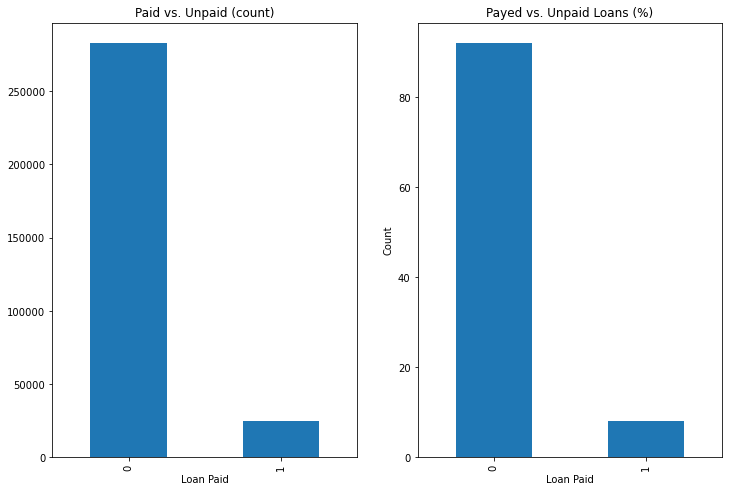

In [254]:
#Create two subplots on 1 row and 2 columns with a figsize of (14, 10)
#get target percentage
target_percent = (df.TARGET.value_counts()/len(df))*100

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
df.TARGET.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Paid vs. Unpaid (count)')
ax[0].set_xlabel('Loan Paid')
target_percent.plot(kind='bar',ax=ax[1])
ax[1].set_xlabel('Loan Paid')
ax[1].set_ylabel('Count')
ax[1].set_title('Payed vs. Unpaid Loans (%)')

Text(0.5, 1.0, 'Loan Types')

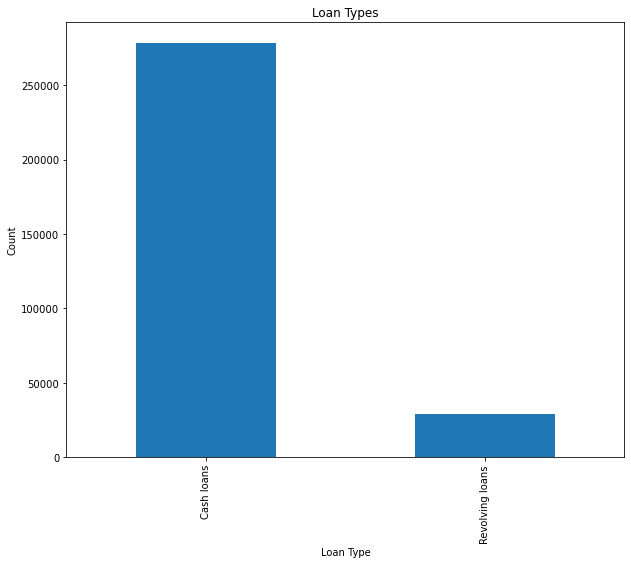

In [255]:
#plot histogram with targets 1 and 0 to see overall credit default 
plt.figure(figsize=(10,8))
df.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Loan Types')